In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

# Read and Normalize Data

In [57]:
language = "de"
df = pd.read_csv(f"../data/seperatable verbs/de_dataset.zip", compression='zip')

In [81]:
X = df.loc[:, "frequency": "ll"][["most_frequent_skip", "word_1_frequency", "word_2_frequency"]]

In [82]:
mms = MinMaxScaler()
X_norm = pd.DataFrame(mms.fit_transform(X)).drop(0, axis=1)
X_norm.columns = X.columns[1:]

In [83]:
Y = df.loc[:, "label"]

# Training and cross-validation



In [84]:
kf = KFold(n_splits=5)

In [85]:
scores = np.zeros((2,25))
depth_range = range(2,25)
for max_depth in depth_range:
    train_scores = []
    test_scores = []
    for train_index, test_index in kf.split(X.values):
        clf = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        clf.fit(X_train, Y_train)
        train_scores.append(f1_score(clf.predict(X_train), Y_train, average="micro"))
        test_scores.append(f1_score(clf.predict(X_test), Y_test, average="micro"))
    scores[0][max_depth] = sum(train_scores)/len(train_scores)
    scores[1][max_depth] = sum(test_scores)/len(test_scores)

# Plot training and test error

In [86]:
scores = scores[:,2:]

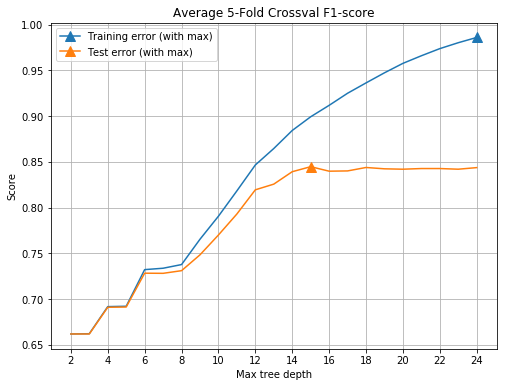

In [87]:
plt.figure(figsize=(8,6))
plt.plot(list(depth_range), scores[0], "^-", markevery=[scores[0].argmax()], markersize=10)
plt.plot(list(depth_range), scores[1], "^-", markevery=[scores[1].argmax()], markersize=10)
plt.title("Average 5-Fold Crossval F1-score")
plt.legend(["Training error (with max)", "Test error (with max)"])
plt.xlabel("Max tree depth")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(np.arange(2, 25, step=2))
plt.savefig("DT_score.png")
plt.show()

In [88]:
print(f"max score:{round(scores[1].max(),3)} @ max depth:{scores[1].argmax()+2}")

max score:0.845 @ max depth:15
